In [1]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

#data cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
#filter for data analyst jobs in the US
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

#drop nan values 
df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])

df_DA_US["salary_year_avg"].sample(10)

590904    100000.0
761597     80000.0
759309     85000.0
419420     95900.0
297107    150000.0
218063     97070.5
643314    140000.0
202205     71500.0
577131     72000.0
168033     95000.0
Name: salary_year_avg, dtype: float64

C:\Users\jojox\AppData\Local\Temp\ipykernel_15896\322598790.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


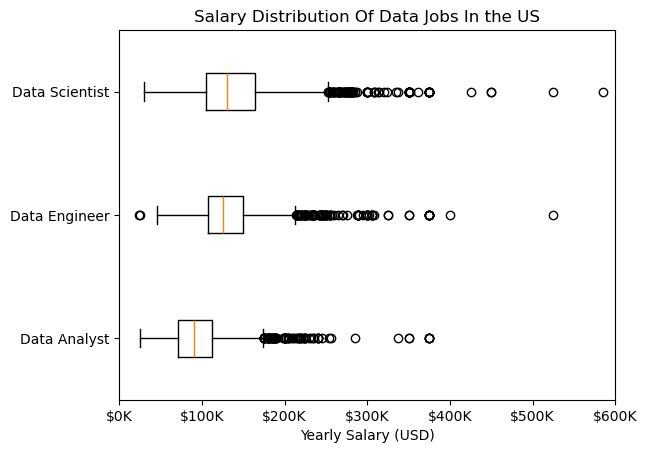

In [13]:
job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]

#filter for data analyst jobs in the US
df_US = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "United States")].copy()
df_US = df_US.dropna(subset=["salary_year_avg"])

job_list = [df_US[df_US["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title("Salary Distribution Of Data Jobs In the US")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.xlim(0, 600000)
plt.show()